In [59]:
import pandas as pd
import numpy as np
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('i30.csv')
data.head(5)

,Price,Desc,Loc,kms,Transmision,engine,Engi,body type,Year
0,"$9,999",2010 Hyundai i30 SX Auto White,"Greenslopes, QLD",102000,Auto,4 cyl 2.0L,2,Hatchback,2010
1,"$9,999",2009 Hyundai i30 FD MY09 SX Red 5 Speed Manual...,"Invermay, TAS",132931,Manual,4 cyl 2.0L,2,Hatchback,2009
2,"$9,999",2008 Hyundai i30 FD SR White 4 Speed Automatic...,"Victoria Park, WA",161000,Auto,4 cyl 2.0L,2,Hatchback,2008
3,"$9,995",2011 Hyundai i30 FD MY11 SX 1.6 CRDi Blue 5 Sp...,"Capalaba, QLD",177305,Manual,4 cyl 1.6L,"1,6",Hatchback,2011
4,"$9,995",2010 Hyundai i30 SX,"Moorooka, QLD",187703,Auto,4 cyl 1.6L,"1,6",Hatchback,2010


In [61]:
data.shape

(689, 9)

In [62]:
data.columns

Index(['Price', 'Desc', 'Loc', 'kms', 'Transmision', 'engine', 'Engi',
       'body type', 'Year'],
      dtype='object')

In [63]:
data.dtypes

Price          object
Desc           object
Loc            object
kms             int64
Transmision    object
engine         object
Engi           object
body type      object
Year           object
dtype: object

### Data Cleansing

---

#### Price

In [64]:
data['Price'] = data['Price'].str.replace('[A-Za-z]', '').str.replace('$', '')
data['Price'] = data['Price'].str.replace('[A-Za-z]', '').str.replace(',', '')

In [65]:
data.Price = data.Price.astype(float)

In [66]:
data.Price.describe()

count      689.000000
mean     23363.031930
std      11742.092429
min       4985.000000
25%      14990.000000
50%      21990.000000
75%      28350.000000
max      62990.000000
Name: Price, dtype: float64

#### Engi-Engine

In [67]:
data["Engi"] = data['Engi'].str.replace('?', '')#.astype(float)
data["Engi"] = data['Engi'].str.replace(',', '.')#.astype(float)



In [68]:
data['Engi'].replace('', np.nan, inplace=True)

In [69]:
data.dropna(inplace = True)

In [70]:
data.Engi.value_counts()

2      340
1.8    158
1.6    145
Name: Engi, dtype: int64

In [71]:
data.Engi = data.Engi.astype(float)

In [72]:
data.engine.value_counts()

4 cyl 2.0L    340
4 cyl 1.8L    158
4 cyl 1.6L    144
1600            1
Name: engine, dtype: int64

In [73]:
# Engine has the same values that Engi, so we can drop the column
data.drop(columns = 'engine' , inplace = True)

#### Year

In [74]:
data["Year"] = data['Year'].str.replace('?', '')#.astype(int)

In [75]:
#Drop values with 0 in year column
data['Year'].replace('', np.nan, inplace=True)

In [76]:
data.dropna(inplace = True)

In [77]:
data.Year = data.Year.astype(int)

In [78]:
data.Year.value_counts()

2018    89
2021    64
2019    63
2020    60
2017    50
2015    47
2014    42
2013    40
2012    40
2009    35
2016    30
2022    27
2011    19
2010    16
2008    13
Name: Year, dtype: int64

In [79]:
data = data[data.Year>2011]

#### Body Type

In [20]:
data['body type'].value_counts()

Hatchback         561
Wagon              38
Sedan              32
Coupe (2 door)      4
Name: body type, dtype: int64

In [82]:
data = data[data['body type']!= 'Coupe (2 door)']

In [83]:
data.dtypes

Price          float64
Desc            object
Loc             object
kms              int64
Transmision     object
Engi           float64
body type       object
Year             int32
dtype: object

In [84]:
data.shape

(548, 8)

### Outliers Analysis

---

In [23]:
data_price = data.groupby(['Engi'])[['Price']]

In [24]:
data_price.describe()

Price                                                                  \
      count          mean           std     min       25%      50%      75%   
Engi                                                                          
1.6   142.0  25649.978873  11978.367987  4990.0  13243.75  29489.5  35415.0   
1.8   155.0  16902.000000   3177.299750  7690.0  14990.00  16999.0  18990.0   
2.0   338.0  26118.423077  12755.471005  4985.0  19487.00  24950.0  29490.0   

               
          max  
Engi           
1.6   55750.0  
1.8   23990.0  
2.0   62990.0

In [25]:
q1 = data_price.quantile(0.25)
print(q1)
q2 = data_price.quantile(0.5)
print(q2)
q3 = data_price.quantile(0.75)
print(q3)

         Price
Engi          
1.6   13243.75
1.8   14990.00
2.0   19487.00
        Price
Engi         
1.6   29489.5
1.8   16999.0
2.0   24950.0
        Price
Engi         
1.6   35415.0
1.8   18990.0
2.0   29490.0


In [26]:
#Se calculan los valores límites a partir de los cuales se delimitarán los valores outliers
iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

          Price
Engi           
1.6   68671.875
1.8   24990.000
2.0   44494.500
          Price
Engi           
1.6  -20013.125
1.8    8990.000
2.0    4482.500


In [27]:
data["outliers"] = data.groupby("Engi")["Price"].transform(lambda grp:  (grp < up_threshold['Price'][grp.name]))


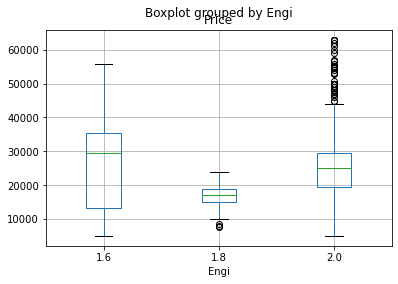

In [28]:
fig = data.boxplot(by='Engi',column= ['Price']) 

In [29]:
data.head()

,Price,Desc,Loc,kms,Transmision,Engi,body type,Year,outliers
0,9999.0,2010 Hyundai i30 SX Auto White,"Greenslopes, QLD",102000,Auto,2.0,Hatchback,2010,True
1,9999.0,2009 Hyundai i30 FD MY09 SX Red 5 Speed Manual...,"Invermay, TAS",132931,Manual,2.0,Hatchback,2009,True
2,9999.0,2008 Hyundai i30 FD SR White 4 Speed Automatic...,"Victoria Park, WA",161000,Auto,2.0,Hatchback,2008,True
3,9995.0,2011 Hyundai i30 FD MY11 SX 1.6 CRDi Blue 5 Sp...,"Capalaba, QLD",177305,Manual,1.6,Hatchback,2011,True
4,9995.0,2010 Hyundai i30 SX,"Moorooka, QLD",187703,Auto,1.6,Hatchback,2010,True


In [30]:
data.shape

(635, 9)

In [31]:
data = data[data.outliers != False]

In [32]:
#Checking that the outliers have been deleted
data.shape

(598, 9)

<AxesSubplot:title={'center':'Price'}, xlabel='Engi'>

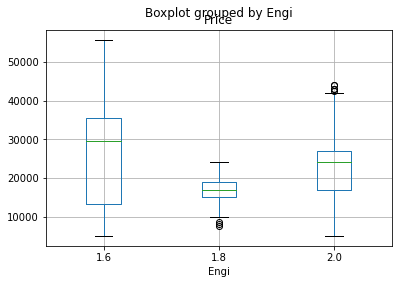

In [33]:
data.boxplot(by='Engi',column= ['Price']) 

In [35]:
#Dummies creation of Year variable 

data = pd.get_dummies(data,columns=['Year'],drop_first=True)

In [36]:
#Dummies creation of Transmision variable 
data = pd.get_dummies(data,columns=['Transmision'],drop_first=True)


In [37]:
#Dummies creation of Body type variable 
data = pd.get_dummies(data,columns=['body type'],drop_first=True)

In [38]:
#Dummies creation of Engi type variable 
data = pd.get_dummies(data,columns=['Engi'],drop_first=True)

### Machine Learning

---

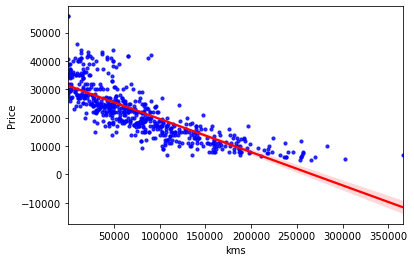

In [39]:
#Template of linear regression
g=sns.regplot(data = data, x = "kms", y = "Price", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"});

In [40]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [41]:
data.columns

Index(['Price', 'Desc', 'Loc', 'kms', 'outliers', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020',
       'Year_2021', 'Year_2022', 'Transmision_Manual', 'body type_Hatchback',
       'body type_Sedan', 'body type_Wagon', 'Engi_1.8', 'Engi_2.0'],
      dtype='object')

In [42]:
X = data.drop(['Price','Loc','Desc','outliers'], axis=1)
y = data['Price']

In [43]:
X.columns

Index(['kms', 'Year_2009', 'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022',
       'Transmision_Manual', 'body type_Hatchback', 'body type_Sedan',
       'body type_Wagon', 'Engi_1.8', 'Engi_2.0'],
      dtype='object')

In [44]:
X.shape

(598, 21)

In [45]:
# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)


In [46]:
model = sm.OLS(y, X).fit()

In [47]:
y_pred = model.predict(X_test)

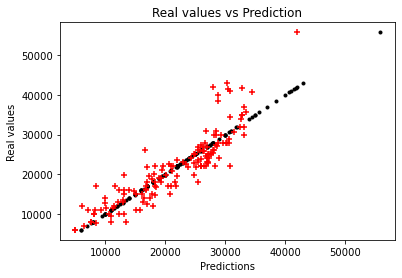

In [48]:
plt.plot(y_test,y_test, '.',c='black')
plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=50)
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.title('Real values vs Prediction')
plt.show()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     135.9
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.89e-207
Time:                        12:06:20   Log-Likelihood:                -5774.7
No. Observations:                 598   AIC:                         1.159e+04
Df Residuals:                     576   BIC:                         1.169e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.304e+04   4124.400      8.012      0.000    2.49e+04    4.11e+04
kms                    -0.0558      0.004    -12.528      0.000      -0.064      -0.047
Year_2009            1442.5702   1286.205      1.122      0.263   -1083.654    3968.795
Year_2010             847.7669   1507.323      0.562      0.574   -2112.753    3808.287
Year_2011             999.3160   1439.930      0.694      0.488   -1828.838    3827.470
Year_2012            3150.9148   1283.465      2.455      0.014     630.072    5671.758
Year_2013            3490.9566   1350.217      2.585      0.010     839.008    6142.905
Year_2014            4645.4202   1432.804      3.242      0.001    1831.263    7459.578
Year_2015            5679.6854   1384.971      4.101      0.000    2959.477    8399.894
Year_2016            6180.3151   1465.727      4.217      0.000    3301.494    9059.137
Year_2017            9184.2316   1290.064      7.119      0.000    6650.429    1.17e+04
Year_2018            1.288e+04   1283.162     10.039      0.000    1.04e+04    1.54e+04
Year_2019            1.364e+04   1334.656     10.218      0.000     1.1e+04    1.63e+04
Year_2020            1.342e+04   1382.396      9.705      0.000    1.07e+04    1.61e+04
Year_2021            1.511e+04   1440.219     10.494      0.000    1.23e+04    1.79e+04
Year_2022             1.38e+04   1606.988      8.589      0.000    1.06e+04     1.7e+04
Transmision_Manual   2734.0731    446.396      6.125      0.000    1857.311    3610.835
body type_Hatchback -1.246e+04   3908.805     -3.187      0.002   -2.01e+04   -4778.839
body type_Sedan     -6253.5575   4040.787     -1.548      0.122   -1.42e+04    1682.917
body type_Wagon     -1.325e+04   3993.955     -3.317      0.001   -2.11e+04   -5403.002
Engi_1.8            -3733.8968    684.667     -5.454      0.000   -5078.645   -2389.148
Engi_2.0            -4649.5593    411.006    -11.313      0.000   -5456.812   -3842.306
==============================================================================
Omnibus:                      130.001   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.722
Skew:                           1.142   Prob(JB):                     2.24e-65
Kurtosis:                       5.594   Cond. No.                     5.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

High p-values on years before 2012

In [50]:
X_2 = X.drop(columns = ['Year_2009', 'Year_2010', 'Year_2011'])

In [51]:
X_2

,const,kms,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Transmision_Manual,body type_Hatchback,body type_Sedan,body type_Wagon,Engi_1.8,Engi_2.0
0,1.0,102000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1.0,132931,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
2,1.0,161000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1.0,177305,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1.0,187703,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1.0,155338,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
685,1.0,199172,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
686,1.0,167201,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
687,1.0,105747,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [57]:
X_2 = sm.add_constant(X_2)

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, random_state=123)

model_2 = sm.OLS(y, X_2).fit()



In [55]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     159.0
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          2.87e-210
Time:                        12:08:16   Log-Likelihood:                -5775.3
No. Observations:                 598   AIC:                         1.159e+04
Df Residuals:                     579   BIC:                         1.167e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.399e+04   3995.856      8.507      0.000    2.61e+04    4.18e+04
kms                    -0.0560      0.004    -12.681      0.000      -0.065      -0.047
Year_2012            2165.1142    798.639      2.711      0.007     596.532    3733.696
Year_2013            2515.1525    904.529      2.781      0.006     738.594    4291.711
Year_2014            3659.0241   1010.330      3.622      0.000    1674.666    5643.382
Year_2015            4688.5575    932.391      5.029      0.000    2857.277    6519.838
Year_2016            5195.4932   1056.195      4.919      0.000    3121.054    7269.933
Year_2017            8202.8491    816.503     10.046      0.000    6599.181    9806.517
Year_2018            1.189e+04    790.923     15.029      0.000    1.03e+04    1.34e+04
Year_2019            1.264e+04    870.858     14.519      0.000    1.09e+04    1.44e+04
Year_2020            1.241e+04    928.543     13.369      0.000    1.06e+04    1.42e+04
Year_2021            1.411e+04   1010.345     13.969      0.000    1.21e+04    1.61e+04
Year_2022            1.281e+04   1241.556     10.321      0.000    1.04e+04    1.53e+04
Transmision_Manual   2718.7707    444.839      6.112      0.000    1845.077    3592.464
body type_Hatchback -1.244e+04   3903.070     -3.188      0.002   -2.01e+04   -4778.557
body type_Sedan     -6237.5892   4034.841     -1.546      0.123   -1.42e+04    1687.120
body type_Wagon     -1.311e+04   3980.980     -3.292      0.001   -2.09e+04   -5286.170
Engi_1.8            -3683.3648    681.605     -5.404      0.000   -5022.084   -2344.646
Engi_2.0            -4587.5359    406.071    -11.297      0.000   -5385.088   -3789.984
==============================================================================
Omnibus:                      129.678   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.672
Skew:                           1.141   Prob(JB):                     6.25e-65
Kurtosis:                       5.580   Cond. No.                     5.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Comments:
#Probar modelo XGBOOST con linear regression a ver si ajusta mejor?
# Como trato una regresion multiple donde una variable es en anios? esta bien usar dummies?